## Análisis de datos - Clase 3

### Datos faltantes

In [45]:
#!pip install missingno

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [47]:
# Cargamos el dataset de Titanic de Seaborn
titanic_df = sns.load_dataset('titanic')

In [48]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 1. Identificación de datos faltantes

In [49]:
titanic_df.isnull().sum() > 0 # se fja si hay NaN en cada columna

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [50]:
titanic_df.isnull().sum()  # Cuenta los NaN en cada columna

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [51]:
titanic_df.isnull()  # DataFrame booleano

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

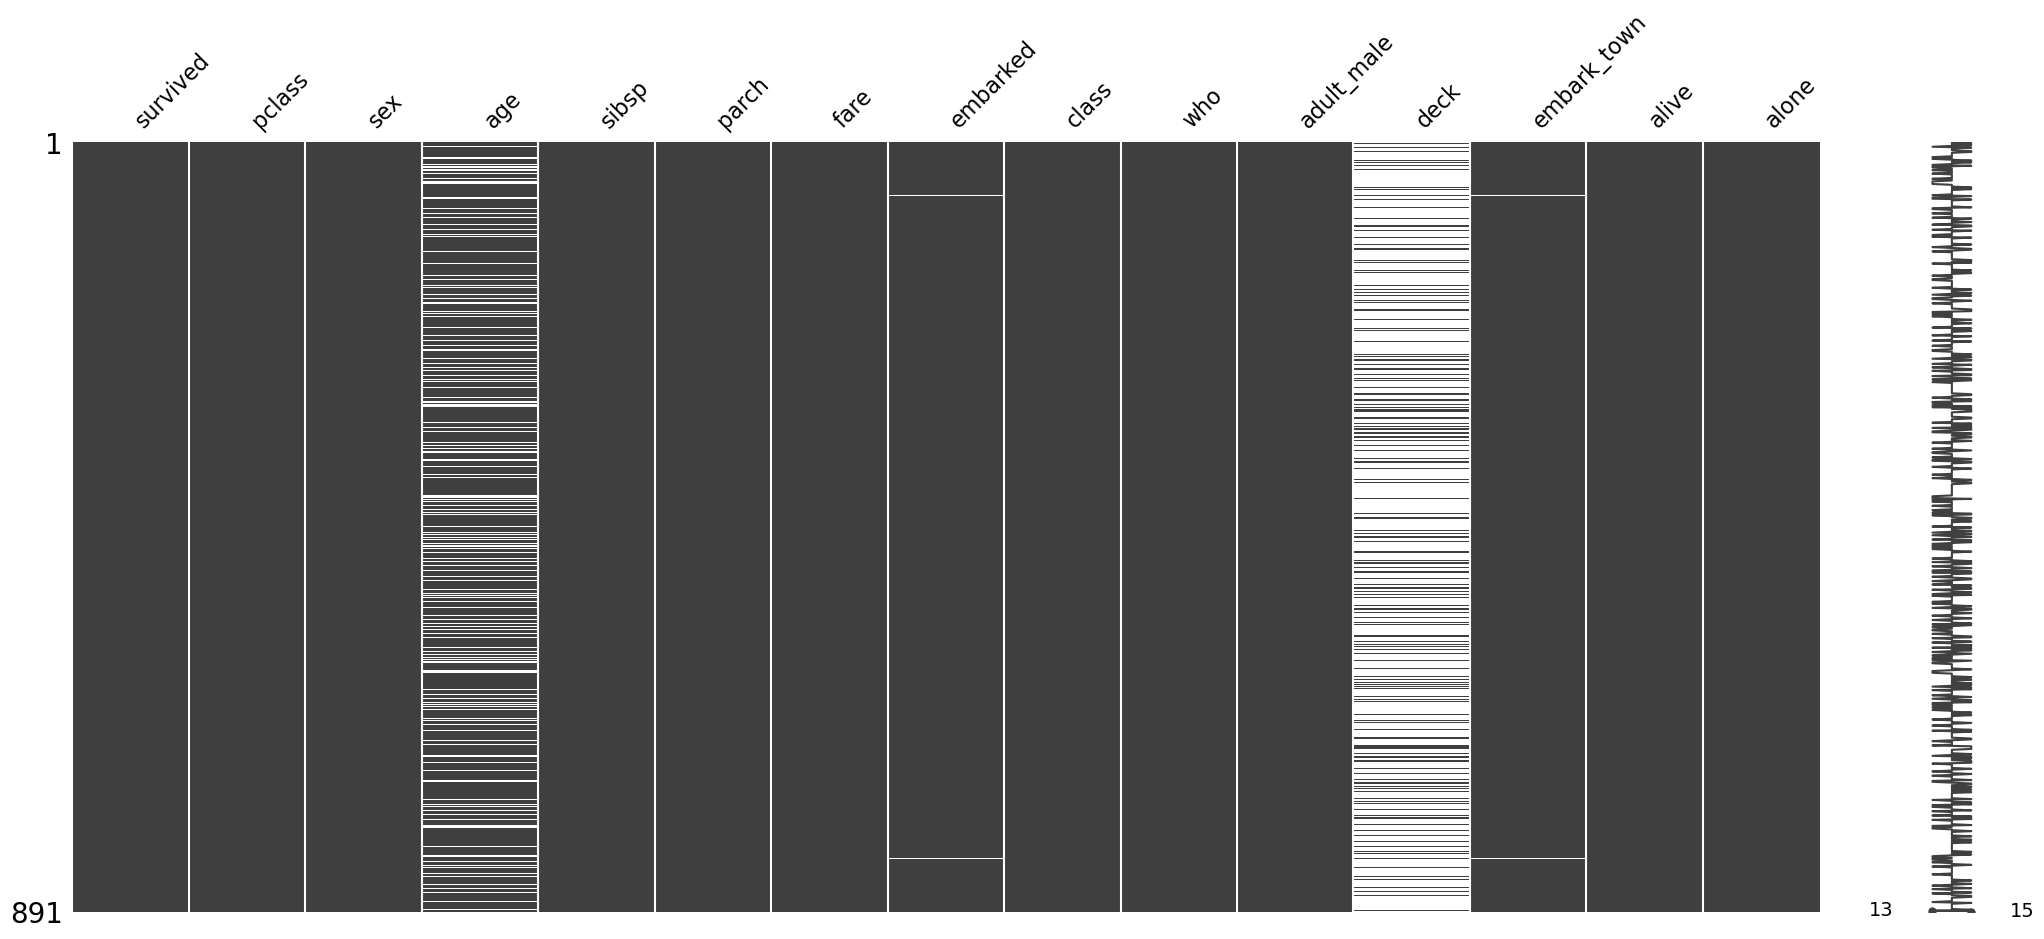

In [52]:
# Matriz de valores faltantes
msno.matrix(titanic_df)

### 2. Eliminación de datos faltantes

Si no hay demasiados valores faltantes o no se los puede imputar de manera confiable

In [53]:
titanic_df.isnull().sum()[titanic_df.isnull().sum() > 0] # columnas con datos faltantes

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

In [54]:
titanic_df.dropna()  # Elimina filas con valores faltantes

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [55]:
titanic_df.dropna(axis=1)  # Elimina columnas con valores faltantes

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


In [56]:
n = titanic_df.shape[0]
umbral = n * .9 # tolerancia de nulos. si la columna tiene menos, la conservo.
titanic_df.dropna(axis=1, thresh= umbral)  # Mantiene columnas con al menos ~800 valores no nulos

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


### 3. Análisis de tipo de datos faltantes

#### Visualización de patrones

- MCAR (Missing Completely At Random)
- MAR (Missing At Random)
- MNAR (Missing Not At Random)

In [57]:
# exploro los datos en los que no conozco la edad
datos_age_null = titanic_df[titanic_df['age'].isnull()]
datos_age_null.describe()

,survived,pclass,age,sibsp,parch,fare
count,177.000000,177.000000,0.0,177.000000,177.000000,177.000000
mean,0.293785,2.598870,NaN,0.564972,0.180791,22.158567
std,0.456787,0.763216,NaN,1.626316,0.534145,31.874608
min,0.000000,1.000000,NaN,0.000000,0.000000,0.000000
25%,0.000000,3.000000,NaN,0.000000,0.000000,7.750000
50%,0.000000,3.000000,NaN,0.000000,0.000000,8.050000
75%,1.000000,3.000000,NaN,0.000000,0.000000,24.150000
max,1.000000,3.000000,NaN,8.000000,2.000000,227.525000


In [58]:
datos_age_null['pclass'].value_counts() # miro más en detalle la columna pclass

3    136
1     30
2     11
Name: pclass, dtype: int64

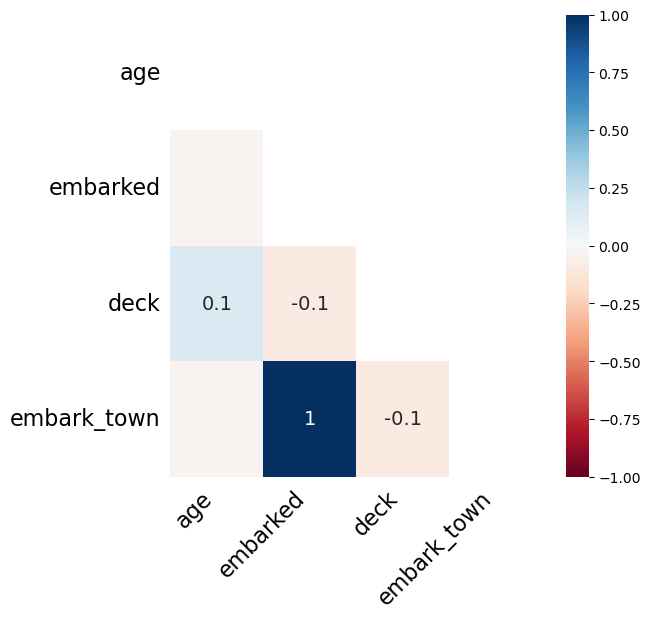

In [59]:
fig, ax = plt.subplots(figsize=(6, 6))
msno.heatmap(titanic_df,ax=ax)  # correlaciones entre valores faltantes
plt.show()

### 4. Imputación de datos faltantes

#### a) con una constante

In [60]:
titanic_df['age_2'] = titanic_df['age']
titanic_df['age_2'].fillna(40, inplace=True)  # Rellena con 40
titanic_df[['age', 'age_2']]

,age,age_2
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,NaN,40.0
889,26.0,26.0


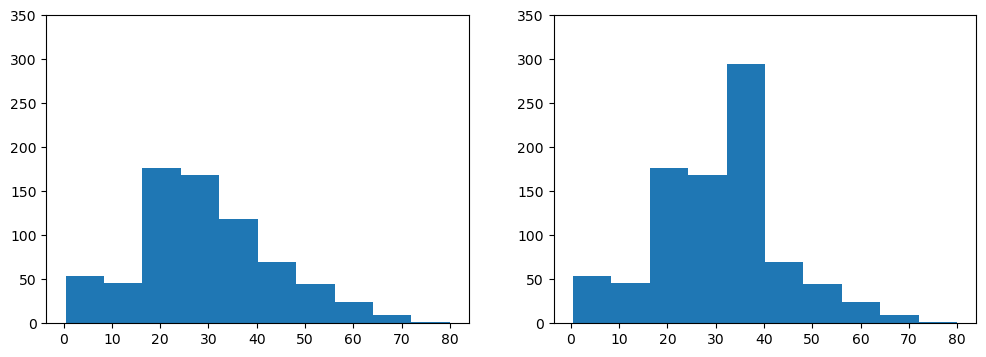

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].hist(titanic_df['age'])
ax[1].hist(titanic_df['age_2'])
ax[0].set_ylim(0, 350)
ax[1].set_ylim(0, 350)
plt.show()

#### b) con valores estadísticos

Útil cuando los datos están MCAR o MAR y la distribución es bastante simétrica.

In [62]:
titanic_df['age_2'] = titanic_df['age']
titanic_df['age_2'].fillna(titanic_df['age'].median(), inplace=True)

#titanic_df['age_2'].fillna(titanic_df['age'].mean(), inplace=True)
#titanic_df['age_2'].fillna(titanic_df['age'].mode().iloc[0], inplace=True)

titanic_df[['age', 'age_2']]

,age,age_2
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,NaN,28.0
889,26.0,26.0


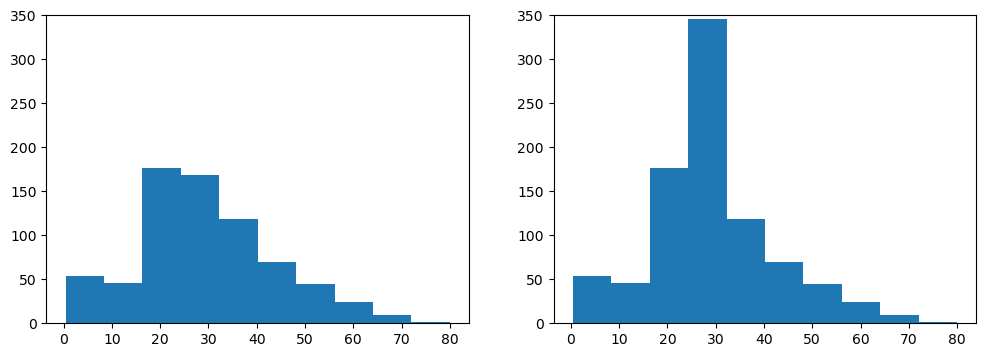

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].hist(titanic_df['age'])
ax[1].hist(titanic_df['age_2'])
ax[0].set_ylim(0, 350)
ax[1].set_ylim(0, 350)
plt.show()

In [64]:
titanic_df[['age','age_2']].describe()

,age,age_2
count,714.000000,891.000000
mean,29.699118,29.361582
std,14.526497,13.019697
min,0.420000,0.420000
25%,20.125000,22.000000
50%,28.000000,28.000000
75%,38.000000,35.000000
max,80.000000,80.000000


#### c) con el valor anterior o posterior (Forward/Backward Fill)

Útil para datos de *series temporales* con valores consecutivos relacionados.

In [65]:
flights = sns.load_dataset('flights')
flights['month'] = pd.to_datetime(flights['month'], format='%b').dt.month
flights['date'] = pd.to_datetime(flights['year'].astype(str) + '-' + flights['month'].astype(str), format='%Y-%m')
flights.head()

,year,month,passengers,date
0,1949,1,112,1949-01-01
1,1949,2,118,1949-02-01
2,1949,3,132,1949-03-01
3,1949,4,129,1949-04-01
4,1949,5,121,1949-05-01


In [66]:
# simulo datos faltantes en 'flights' solo a los efectos de hacer el ejercicio

flights['passengers_original'] = flights['passengers'] # hago una copia (backup) de la columna original

np.random.seed(42)
missing_percentage = 0.25  # 25% de los valores faltantes
n_missing = int(len(flights) * missing_percentage)
missing_indices = np.random.choice(flights.index, size=n_missing, replace=False)
flights.loc[missing_indices, 'passengers'] = np.nan
flights

,year,month,passengers,date,passengers_original
0,1949,1,112.0,1949-01-01,112
1,1949,2,118.0,1949-02-01,118
2,1949,3,132.0,1949-03-01,132
3,1949,4,129.0,1949-04-01,129
4,1949,5,NaN,1949-05-01,121
...,...,...,...,...,...
139,1960,8,606.0,1960-08-01,606
140,1960,9,508.0,1960-09-01,508
141,1960,10,461.0,1960-10-01,461
142,1960,11,390.0,1960-11-01,390


In [67]:
flights.isnull().sum()

year                    0
month                   0
passengers             36
date                    0
passengers_original     0
dtype: int64

In [68]:
flights['passengers_2'] = flights['passengers']
flights['passengers_3'] = flights['passengers']
flights['passengers_2'].fillna(method='ffill', inplace=True) # valor anterior
flights['passengers_3'].fillna(method='bfill', inplace=True) # valor posterior

flights[['passengers', 'passengers_2', 'passengers_3']]

,passengers,passengers_2,passengers_3
0,112.0,112.0,112.0
1,118.0,118.0,118.0
2,132.0,132.0,132.0
3,129.0,129.0,129.0
4,NaN,129.0,135.0
...,...,...,...
139,606.0,606.0,606.0
140,508.0,508.0,508.0
141,461.0,461.0,461.0
142,390.0,390.0,390.0


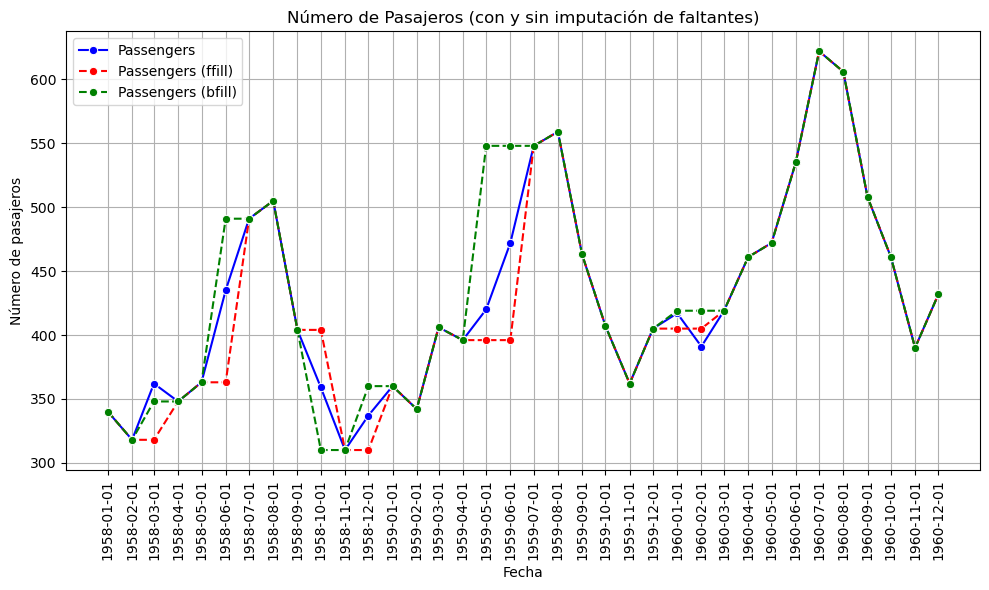

In [69]:
plt.figure(figsize=(10, 6))

data = flights[flights['year']>1957]

sns.lineplot(data=data, x='date', y='passengers_original', errorbar=None, label='Passengers', color='blue', marker='o')
sns.lineplot(data=data, x='date', y='passengers_2', errorbar=None, label='Passengers (ffill)', color='red', linestyle='--', marker='o')
sns.lineplot(data=data, x='date', y='passengers_3', errorbar=None, label='Passengers (bfill)', color='green', linestyle='--', marker='o')

# Agregar etiquetas y título
plt.title('Número de Pasajeros (con y sin imputación de faltantes)')
plt.xlabel('Fecha')
plt.ylabel('Número de pasajeros')
plt.xticks(ticks=data['date'], rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
